# Fitting Cosmological Models to Type 1a Supernova Data with Minuit
 >__Created__:  Summer 2017 Harrison B. Prosper<br>
 >__Updated__:  Fall 2021 for LPC Stats 2021

## Preamble

In this tutorial, you will learn how to use the CERN function minimization package __Minuit__, via the very convenient __[iminuit](https://iminuit.readthedocs.io/en/stable/index.html)__ Python module. Minuit was developed by CERN scientist Dr. Fred James and is released with the CERN data analysis package __[ROOT](http://root.cern.ch)__. Minuit will be used to fit simple cosmological models to the __[SCP Union2.1 Compilation](https://supernova.lbl.gov/Union/)__ of Type 1a supernova data. 

 >__Prerequisite__: some familiarity with __[Python](http://www.python.org)__ is helpful. 
<br>

If you have a __miniconda3__ environment iminuit can be installed using
```bash
conda install -c conda-forge iminuit
```

For completeness, I start with a bit of background to this problem.

## Introduction

A __[Type Ia supernova](https://en.wikipedia.org/wiki/Type_Ia_supernova)__ is thought to be the thermonuclear detonation of a carbon-oxygen white dwarf whose mass has reached the __[Chandrasekhar limit](https://en.wikipedia.org/wiki/Chandrasekhar_limit)__ of about 1.4 times the mass of the Sun. Beyond that mass limit, the "quantum pressure" of the electrons due to the Pauli exclusion principle is insufficient to keep the white dwarf stable. The favored model is a binary system in which a white dwarf accretes hydrogen from its red giant partner until the white dwarf reaches the point of thermonuclear instability. The fact that roughly the same mass explodes each time, namely 1.4 solar masses, which yields an immensely luminous event, makes Type 1a supernovae excellent markers for measuring cosmological distances. While there is some variation in the luminosity of these explosions, it turns out that through a simple empirical procedure it is possible to convert these explosions into standard candles. Given a standard candle, that is, a system of known luminosity and therefore known intrinsic brightness, and given the system's apparent brightness, the inverse square law can be used to infer the distance to the system. If we can determine the distance and redshift $z = (\lambda_o - \lambda_e)/ \lambda_e$ for many Type 1a supernovae, we can use these data (and others) to infer the parameters of cosmological models. The observed wavelength $\lambda_o$ is readily measured, while the emitted wavelength $\lambda_e$, that is, the wavelength of the light emitted by the supernova in its rest frame, can be inferred by identifying the known spectral lines of the excited atoms and molecules in the supernova.

Current cosmological models of the universe are based on the __1st Friedmann equation__,

\begin{equation}
\left(\frac{\dot{a}}{a} \right)^2 = \frac{8\pi G}{3}\rho(a) - \frac{K c^2}{a^2} + \frac{\Lambda c^2}{3},
\end{equation}

and the __Friedmann-Lemaitre-Robertson-Walker__ (FLRW) metric

\begin{equation}
    ds^2 = (c dt)^2 - a^2(t)\left[ \frac{dr^2}{1 - Kr^2} + r^2 (d\theta^2 + \sin^2\theta \, d\phi^2) \right],
\end{equation}

where $a(t)$ is a dimensionless function, called the __scale factor__, that models how __proper distances__ change with cosmic time $t$. The proper distance is the spacetime separation between *simultaneous* events. By convention, the scale factor is normalized so that $a(t_0) = 1$ at the present epoch $t_0$, which is the elapsed time since the Big Bang, defined by $a(0) = 0$. $G$ is the gravitational constant, $c$ the speed of light in vacuum, $\dot{a} \equiv da/dt$, and $\rho c^2$ is the density of all forms of energy excluding that due to the cosmological constant $\Lambda$. The constant $K$, which has units of inverse area, is the global curvature of space. 

Care must be exercised in interpreting the symbols of any metric. For example, the radial coordinate $r$ is not the proper distance between the center of the sphere at $r = 0$ and the sphere! The operational meaning of the radial coordinate $r$ is simply $r = \sqrt{A \, / \, (4\pi)}$, where $A$ is the proper area of the sphere centered at $r = 0$, *today*. The proper distance between any two nearby galaxies today, when by choice $a(t_0) = 1$, is the square root of the term in square brackets in the FLRW metric. That distance, $d\chi$, is called the __comoving distance__. It is comoving because the coordinate grid that defines it expands with the universe. Therefore, if a galaxy is stationary with respect to this expanding grid, its comoving coordinates (relative to some origin) do not change. By choice, comoving distances match proper distances today; at any other time $t$, the proper distance between any two galaxies that are not necessarily nearby is given by 
    \begin{equation}
    d(t) = a(t) \, \chi.
    \end{equation}

The motion of galaxies relative to the expanding comoving grid, the so-called perculiar motion, is small (roughly on the order of 200 km/s) compared with the speed of light. Therefore, on the scale of millions of years, it is a very good approximation to presume that the same time $t$ since the Big Bang can be assigned to all galaxies, that is, that all galaxies share the same surfaces of simultaneity. This is just as well, because it makes it possible to describe the evolution of the universe in a way that is not specific to our particular circumstance. Ironically, however, this is a highly non-relativistic way to conceptual spacetime. In principle, spacetime is to be regarded as a completed 4-dimensional "thing" that doesn't evolve; spacetime just is!

Without loss of generality, the comoving distance between any two galaxies can be oriented to lie along the radial direction, for which $d\theta = d\phi = 0$. Since, by definition, the comoving distance is the proper distance between galaxies today, it follows that 
$$\chi = \int_0^r \frac{dy}{\sqrt{1 - K y^2}} = \sin^{-1}(\sqrt{K} \, r) / \sqrt{K},$$
where, in order to avoid confusion, $y$ is used as the integration variable to distinguish it from its lower and upper bounds. The result can be inverted to give
    \begin{equation}
    r = \sin(\sqrt{K}\chi)/\sqrt{K}.
    \end{equation}


## First Friedmann Equation
Consider the scaling law $d(t) = a(t) \, \chi$ and its derivative $\dot{d} = \dot{a} \, \chi$ with respect to the universal time $t$. If we interpret $v(t) = \dot{d}$ as the proper velocity of the expansion, then we arrive at the general form of Hubble's law
$$v(t) = H(t) \, d(t),$$
where $H(t) = \dot{a} / a$ is called the __Hubble parameter__ and __Hubble's constant__ is $H_0 = H(t_0)$. Therefore, the Friedmann equation at time $t_0$ is 
$$H_0^2 = \frac{8\pi G}{3}\rho(1) - K c^2 + \frac{\Lambda c^2}{3},$$
or, equivalently,
$$1 = \frac{8\pi G}{3H_0^2}\rho(1) - \frac{K c^2}{H_0^2} + \frac{\Lambda c^2}{3 H_0^2}.$$
Notice that each term on the right-hand side is dimensionless, suggesting that it might be useful to define the dimensionless functions 
\begin{eqnarray}
    \Omega_M(a) & = & \frac{8\pi G}{3H_0^2}\rho(a), \nonumber\\
    \Omega_K(a) & = & - \frac{K c^2}{H_0^2} \frac{1}{a^2}, \quad\textrm{and}\nonumber\\
    \Omega_\Lambda & = & \frac{\Lambda c^2}{3 H_0^2},
\end{eqnarray}
for arbitrary values of $a$. It is also useful to define
$\Omega(a)$ as the sum of these functions. Then, we can write 1st Friedmann equation as
\begin{equation}
\dot{a} = H_0 a \sqrt{\Omega(a)}.
\end{equation}
Notice also that the quantities $\Omega_M(1)$, $\Omega_K(1)$, and $\Omega_\Lambda$ satisfy the sum rule
    \begin{equation}
    \Omega_M(1) + \Omega_K(1) + \Omega_\Lambda = 1,
    \end{equation}
which implies the condition $\Omega(1) = 1$, irrespective of the cosmological model.

For simplicity, we shall take the dimensionless functions written *without* the dependence on $a$ to be the values of the functions evaluated at $a = 1$; for example, $\Omega_M$ is a synonym for $\Omega_M(1)$. The alternative convention is to append the subscript 0 to each symbol to denote its value today, e.g., $\Omega_{M0}$.


## Cosmological Models
For our purposes, a cosmological model is a mathematical description of how the dimensionless density $\Omega(a)$ in the model universe evolves with the scale factor $a$ together with the dependence of the scale factor on the universal time $t$, obtained by solving the (1st) Friedmann equation $\dot{a} = H_0 a \sqrt{\Omega(a)}.$

In this tutorial, we consider two cosmological models, the standard model of cosmology $\Lambda\textrm{CDM}$ in which on every surface of simultanaeity (aka 3D space!) the model universe is filled with a homogeneous distribution of massless particles, a pressureless dust of galaxies, and a cosmological constant $\Lambda$. The second model (which I cooked up during an introductory class I taught on modern physics) is a phantom energy model in which the validity of the Friedmann equation is assumed. 

### $\Lambda\textrm{CDM}$ Model
During most of the history of the universe, the energy density due to massless particles is negligible. Therefore, in a universe in which matter is conserved we can write
$$\Omega_M(a) = \frac{\Omega_M}{a^3}.$$
This makes sense because if we double proper distances, we expect the matter density to go down by $2^3$. The $\Lambda\textrm{CDM}$ model is therefore defined by
\begin{equation}
\Omega(a) = \frac{\Omega_M}{a^3} + \frac{1 - \Omega_M - \Omega_\Lambda}{a^2} + \Omega_\Lambda,
\end{equation}
where $\Omega_M$, $\Omega_\Lambda$, and $H_0$ are the free parameters of the model.

### A Phantom Energy Model
This model is defined by
    \begin{equation}
    \Omega(a) = \frac{e^{a^n - 1}}{a^3},
    \end{equation}
and the parameters $n$ and $H_0$. Given the degeneracy inherent in the Friedmann equation, any model $\Omega(a)$ is consistent with infinitely many universes, each differing in content! For example, it is possible to regard the phantom energy model as one in which the phantom energy is coupled to matter in such a way that 
$$\Omega(a) = \frac{\Omega_M}{a^3} + \frac{e^{a^n - 1} - \Omega_M}{a^3}.$$
But, since neither the curvature parameter $\Omega_K$ nor the mass parameter $\Omega_M$ are identifiable in this model, we can choose their values at will. In particular, in order to be consistent with observations, we can choose  $\Omega_K = 0$ and $\Omega_M \approx 0.30$!

Interestingly, this model can  be integrated exactly. We find that
    \begin{equation}
    H_0 t = \sqrt{e} \, 2^{3/(2n)} \, \Gamma(3/(2n), \, a^n \, / \, 2) \, / \, n,
    \end{equation}
with a future singularity (dubbed the __Big Rip__) characterized by the condition $a \rightarrow \infty$ at a *finite* time. In this model, the Big Rip occurs at
    \begin{equation}
    t_\textrm{rip} = \frac{1}{H_0}\sqrt{e} \, 2^{3/(2n)} \, \Gamma(3/(2n)) \, n,
    \end{equation}
where $\Gamma(s, x) = \int_0^x \, t^{s - 1} \, e^{-t} \, dt$ is the 
__[incomplete gamma function](http://mathworld.wolfram.com/IncompleteGammaFunction.html)__.

## Distance Modulus
In a non-expanding universe, the energy flux $f$ from a supernova of luminosity $L$ (in watts), is given by the inverse square law, 
\begin{equation}
f = \frac{L}{4 \pi \, r^2}.
\end{equation}
However, in an expanding universe, the luminosity crossing a sphere of proper area $A = 4 \pi \, r^2$ is reduced by the factor $(1 + z)^2$; one factor of $(1 + z)$ arises from the reduction in a photon's energy by the time it reaches the sphere due to the expansion of the universe, and another factor arises from the lower rate at which photons arrive, again because of the expansion. Therefore, in an expanding universe the flux through the sphere today is given by 
\begin{equation}
f = \frac{L}{4 \pi \, d_L^2},
\end{equation}
where
\begin{eqnarray}
    d_L & = & (1 + z) \, r, \nonumber\\
    & = & (1 + z) \, \sin(\sqrt{K}\chi)/\sqrt{K},
\end{eqnarray} is called the luminosity distance.

Astronomers are fond of odd units. Rather than work with flux, they use apparent magnitude $m$, defined by $f = q 10^{-2 m / 5} = L / (4 \pi d_L^2),$ 
where $q$ is the flux of objects of zero magnitude. In addition, astronomers define an absolute magnitude $M$ through $f_M = q 10^{-2 M / 5} = L /(4 \pi d_M^2).$

The absolute magnitude of an object is its apparent magnitude if it were placed at a distance of $d_M = 10\,\textrm{parsecs}$, that is, $10^{-5}$ mega-parsecs (Mpc). The standard measure of distance used in observational cosmology is the distance modulus $\mu = m - M$, which, noting that $f_M / f = 10^{2 (m - M)/5} = (d_L / 10^{-5})^2$, is given by
\begin{equation}
    \mu = 5 \log_{10}[(1+z) d_L] + 25.
\end{equation}



## Comoving Distance

We need to express the comoving distance $\chi$ in terms of the parameters of the cosmological model. 
To that end, consider the worldline of a photon in spacetime. Massless particles travel on null geodesics, defined by $ds = 0$, for which $c dt = a(t) d\chi$. The latter expression is deceptively simple. The left-hand side states that a photon travels a distance $c dt$ from some event $A(t)$ to a *non-simultaneous* event $B(t + dt)$. But on the right-hand side, the comoving distance $d\chi$ between *simultaneous* events $A(t)$ and $B(t)$ is scaled by the factor $a(t)$ to give the proper distance $a(t) d\chi$ between these events. The correspondence between the distance traveled by light and the proper distance permits the use of the worldline of a photon as a standard ruler whose measure, namely the distance traveled by light in the time interval $(t, t + dt)$, can be scaled by $1/a(t)$ to yield an expression for the comoving distance $d\chi = c dt \, / \, a(t)$ that depends on the cosmological model. In order to compute the comoving distance $\chi$ between a supernova explosion at time $t_1$ whose light is detected, now, at time $t_0$, we need merely compute the integral
\begin{eqnarray}
   \chi & = & \int_{t_1}^{t_0} \frac{c dt}{a}, \nonumber\\
            & = & c \int_{1/(1+z)}^{1} \frac{da}{a \dot{a}},
\end{eqnarray}
where $a(t_1) = 1/(1+z)$ is the scale factor at the time of the supernova explosion and $a(t_0) = 1$ is the scale factor when the light is detected.
After replacing $\dot{a}$ with the right-hand side of the Friedmann equation $\dot{a} = H_0 a \sqrt{\Omega(a)}$, and defining
<div class="alert alert-block alert-warning">
\begin{equation}
\boxed{
    u(z) \equiv \int_{1/(1+z)}^{1} \frac{da}{a^2\sqrt{\Omega(a)}}}\, ,
\end{equation}
</div>
we find
\begin{equation}
    \chi = \frac{c}{H_0} \, u(z).
\end{equation}

In the luminosity distance, $d_L = (1 + z) \, \sin(\sqrt{K}\chi)/\sqrt{K}$, the product $\sqrt{K}\chi$ is necessarily dimensionless. Recall that $\Omega_K = -K c^2 / H_0^2$; therefore, $\sqrt{K} = \sqrt{-\Omega_K}\, H_0 / \, c$. 
Consequently,  $\sqrt{K}\chi = \sqrt{-\Omega_K} \, u$. Therefore,
we can rewrite the luminosity distance as the product 
    \begin{equation}
    d_L = \frac{c}{H_0} \, (1 + z) \, \sin(\sqrt{-\Omega_K} \, u)\, / \, \sqrt{-\Omega_K},
    \end{equation}
of the __Hubble distance__ $c \, / \, H_0$ and a dimensionless
function of the cosmological parameters, which leads to the final form of the distance modulus, namely,
<div class="alert alert-block alert-warning">
\begin{equation}
\boxed{\,
    \mu = 5 \log_{10}[(1 + z) \, \sin(\sqrt{-\Omega_K} \, u)\, / \, \sqrt{-\Omega_K}] - 5 \log_{10}(H_0) + 5 \log_{10}(c) + 25\,}\,.
\end{equation}
</div>
Note that $\sin(\sqrt{-\Omega_K} \, u)\, / \, \sqrt{-\Omega_K} \rightarrow u$ as $\Omega_K \rightarrow 0$, that is, in the limit of a globally flat spatial geometry.


## Lifetime of the Universe
Through a slight rearrangement of the Friedmann equation, $\dot{a} = H_0 a \sqrt{\Omega(a)}$, we can find $t$ as a function of the scale factor, $a$, 
    \begin{equation}
    t = \frac{1}{H_0}\int_0^a \frac{dy}{y \sqrt{\Omega(y)}}.
    \end{equation}
By construction, the elapsed time since the Big Bang, $t_0$, is obtained by setting $a = 1$ in the function $t(a)$.


## Fitting Models to Supernova Data
For each supernova, $i$, of which there are $N = 580$ in the __[Union 2.1 compilation](http://supernova.lbl.gov/union/)__, the data comprises the redshift $z_i$, which is measured with negligible error, the measured distance modulus $x_i$ and the associated uncertainty $\sigma_i$, which is taken to be the standard deviation of a Gaussian likelihood,

$$p(x_i\,|\,z_i, \sigma_i, \theta) = \textrm{Gauss}(x_i, \mu(z_i, \theta), \sigma_i),$$

where $\theta$ denote the cosmological parameters.
The supernova data are __heteroscadastic__, which means that, in general, the standard deviations $\sigma_i$ vary from one supernova to the next. Neglecting correlations between the measurements, we can write the overall likelihood of the supernova data as
$$p(x\,|\,z, \sigma, \theta) = \prod_{i=1}^{N} \, p(x_i\,|\,z_i, \sigma_i, \theta).$$
The best fit values are obtained via maximum likelihood, or equivalently, by minimizing the negative log-likelihood,
which for data with Gaussian errors is the same as minimizing the $\chi^2$,
<div class="alert alert-block alert-warning">
$$\chi^2(\theta) = \sum_{i=1}^{N} \, \left[\frac{x_i - \mu(z_i, \theta)}{\sigma_i} \right]^2.$$
</div>

For a good fit, we expect $\textrm{min}[\chi^2] \, / \, \textrm{ndf} \approx 1$, where the number of degrees of freedom (ndf) $= N - P$, where $P$ is the number of free parameters.



### Load Type 1a utilities

In [1]:
%run ../type1autil.ipynb

Welcome to JupyROOT 6.24/00


### Read Type 1a supernova data 

### Select data

number of observations: 580
     	         z	         x +/- dx        
    0	     0.028	   35.3466 +/- 0.2239    
  100	     0.065	   37.3067 +/- 0.1628    
  200	     0.194	   39.9615 +/- 0.1264    
  300	     0.620	   43.2280 +/- 0.3903    
  400	     0.710	   43.0220 +/- 0.1843    
  500	     0.564	   42.3729 +/- 0.2920    

fig_union_2_1_data.pdf


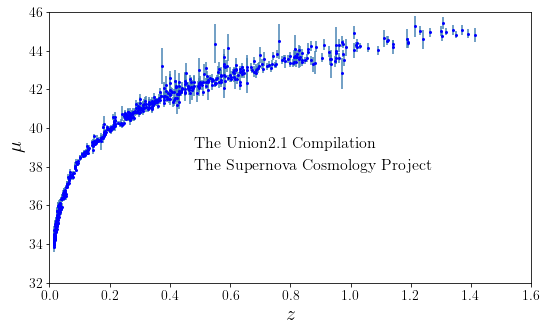

In [104]:
# place results in a bag for later use
class Bag: pass

bag = Bag()

filename = '../SCPUnion2.1_mu_vs_z.txt'

z, mu, dmu = read_data(filename)

Ndata = 100

random_choice = False

if random_choice:
    k = np.random.choice(len(z), Ndata)
    bag.z   = z[k]
    bag.mu  = mu[k]
    bag.dmu = dmu[k]
else:
    bag.z   = z
    bag.mu  = mu
    bag.dmu = dmu

Ndata = len(bag.z)

plot_data(bag)

### Choose model
   * 'LCDM' or 'phantom'
   * Compile C++ CosmicCode using ROOT

In [105]:
bag.name   = 'phantom'

bag.code, bag.params = compileCode(bag, PARAMS)

# initialize a C array for the parameters; this is needed for
# distanceModulus
bag.p = array('d')

print('\nInitial values of free parameters for %s model' % bag.name)

for name, value, _, _ in bag.params:
    bag.p.append(value)
    print('%s\t%5.2f' % (name, value)) 
        
guess = np.array(bag.p)


Initial values of free parameters for phantom model
n	 2.00
H0	70.00

	phantom model



### Function to be minimized modeled as a Python class

The function to be minimized is (within a constant) the negative log-likelihood. Here the errors are assumed to be Gaussian distributed.

From the __[Cramér–Rao bound](https://en.wikipedia.org/wiki/Cram%C3%A9r%E2%80%93Rao_bound)__ it follows that $\hat{\theta}$

\begin{align*}
    \text{var}(\hat{\theta}) & = \text{I}(\theta)^{-1},
\end{align*}

*asymptotically*, where

\begin{align*}
    I_{ij} & = \text{E}\left[ \frac{\partial \log f(x, \theta)} {\partial\theta_i} \frac{\partial \log f(x, \theta)} {\partial\theta_j}  \right] ,
\end{align*}

are the elements of the Fisher information matrix and where the expectation is with respect to the probability model $f(x, \theta)$. If the domain of $x$ is independent of $\theta$ then the Fisher information matrix can be written as

\begin{align*}
    I_{ij} & = \text{E}\left[ \frac{\partial^2} {\partial\theta_i \, \partial\theta_j} (-\log f(x, \theta))  \right] ,
\end{align*}

that is, as the Hessian of the negative log-probability model. Confusingly, the latter is invariably referred to as the negative log-likelihood even though, in principle, the likelihood is the probability model into which data have been entered and is therefore no longer a function of $x$!

In [106]:
def nll(pars, *args):
    bag = args[0]
    
    # put a bound on parameters
    if ((pars <= 0) + (pars >= 200)).any():
        return 1.e10
    
    # copy from numpy array to regular array
    for i, v in enumerate(pars): bag.p[i] = v
   
    f = np.array([bag.code.distanceModulus(u, bag.p) for u in bag.z])      
    c = (bag.mu - f) / bag.dmu
    c = c * c 
    return c.sum()/2
      
# Tell Minuit that the cost function is a negative 
# log-likelihood so that the Hessian is scaled correctly.
nll.errordef = im.Minuit.LIKELIHOOD

### Perform fit using the *iminuit* wrapper

In [107]:
results = im.minimize(nll, guess, args=(bag,)) 
bag.x   = results.x
bag.cov = results.hess_inv

print(bag.x)
print(bag.cov)

[ 2.81056656 70.40914879]
┌────┬───────────────┐
│    │     x0     x1 │
├────┼───────────────┤
│ x0 │ 0.0348 0.0725 │
│ x1 │ 0.0725  0.205 │
└────┴───────────────┘


In [108]:
# get value of -2*log(model) at best-fit value
nll0 = 2*nll(bag.x, bag)

# get value of Gaussian approximation of likelihood about maximum
mvn0 = st.multivariate_normal.pdf(bag.x, bag.x, bag.cov)

In [109]:
def mvg(params):
    f  = st.multivariate_normal.pdf(params, 
                                    bag.x, 
                                    bag.cov) / mvn0
    return f

def ll(params):
    return np.exp(-(nll(params, bag) - nll0))

In [110]:
NMIN =  0.00
NMAX =  4.00
HMIN = 64.00
HMAX = 78.00

def compute_lhood(f, 
                  nsteps=100, 
                  xmin=NMIN, xmax=NMAX,
                  ymin=HMIN, ymax=HMAX):
    
    # 1. first create a mesh grid
    xdelta = float(xmax-xmin)/nsteps
    ydelta = float(ymax-ymin)/nsteps
    x      = np.arange(xmin, xmax, xdelta)
    y      = np.arange(ymin, ymax, ydelta)
    x, y   = np.meshgrid(x, y)
    
    # 2. compute likelihoods at all mesh grid points
    z = [f(params) for params in zip(x.flatten(), y.flatten())]
    z = np.array(z).reshape(x.shape)

    return (x, y, z)

In [111]:
def plot_lhood(ndata,
               points,
               approx=None,
               nsteps=50, 
               xmin=NMIN, xmax=NMAX, 
               ymin=HMIN, ymax=HMAX, 
               ftsize=20, 
               fgsize=(6, 6)):

    # set size of figure
    fig = plt.figure(figsize=fgsize)

    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    
    # annotate axes
    plt.xlabel(r'$n$', fontsize=ftsize)
    plt.ylabel(r'$H_0$', fontsize=ftsize)
    
    # plot contours
    rainbow = plt.get_cmap('rainbow')
    x, y, z = points
    c1 = plt.contour(x, y, z, cmap=rainbow)
    c1.collections[0].set_label('true likelihood')
    
    if approx != None:
        # plot contours
        earth   = plt.get_cmap('gist_earth')
        x, y, z = approx
        c2 = plt.contour(x, y, z, cmap=earth)
        c2.collections[0].set_label('Gaussian approx.')

    plt.text(0.2, 75, 'data points: %d' % ndata)
    # display legends
    plt.legend(loc='upper right', fontsize=18)
    
    fig.tight_layout()
    filename = 'fig_phantom_%d.pdf' % ndata
    print(filename)
    plt.savefig(filename)
    plt.show()

In [112]:
ll_true   = compute_lhood(ll)

In [113]:
ll_approx = compute_lhood(mvg)

fig_phantom_580.pdf


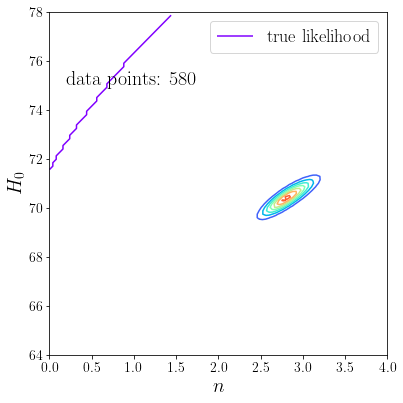

In [116]:
plot_lhood(len(bag.z), ll_true)

### Plot Results


fig_phantom_union_2_1_fit.pdf


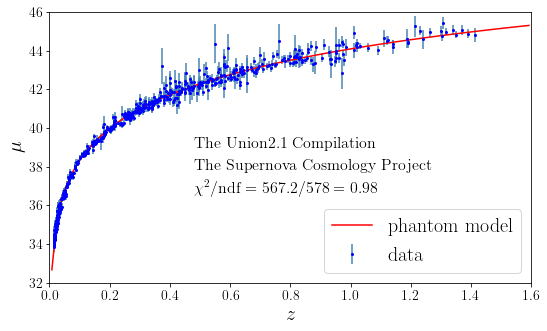

In [117]:
plot_data(bag, nll)

### Plot predicted scale factor vs. time


fig_phantom_scale_factor.pdf


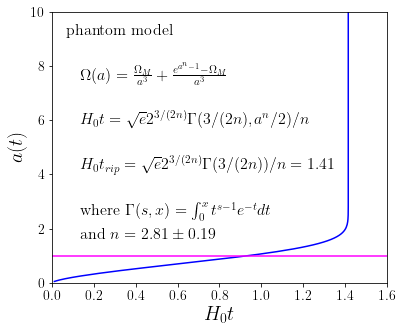

In [7]:
plot_scale_factor(bag)